In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats
import numpy as np

df = pd.read_csv('earthquake_dataset.csv')

data_modified = df[['time', 'latitude', 'longitude', 'mag']]

data_modified['time'] = pd.to_datetime(df['time'])

data_modified.info()
data_modified.head()

# filtered_data_higher = data_modified[data_modified['mag'] >= 5]
# filtered_data_lower = data_modified[data_modified['mag'] < 5]

# result_higher = filtered_data_higher[['mag']]
# result_lower = filtered_data_lower[['mag']]

# count_higher = filtered_data_higher['mag'].count()
# count_lower = filtered_data_lower['mag'].count()

# print("Number of values with mag >= 5:", count_higher)

# print("Number of values with mag < 5:", count_lower)

# print("Minimum of magnitude:", min(df['mag']))
# print("Maximum of magnitude:", max(df['mag']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9042 entries, 0 to 9041
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   time       9042 non-null   datetime64[ns, UTC]
 1   latitude   9042 non-null   float64            
 2   longitude  9042 non-null   float64            
 3   mag        9042 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 282.7 KB


C:\Users\20233897\AppData\Local\Temp\ipykernel_10184\1321369181.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['time'] = pd.to_datetime(df['time'])


,time,latitude,longitude,mag
0,2019-09-30 02:00:14.699000+00:00,5.7453,126.4146,4.3
1,2019-09-30 02:16:00.787000+00:00,6.1976,127.5821,4.4
2,2019-09-30 06:53:00.719000+00:00,-0.1975,124.7617,4.3
3,2019-09-30 09:31:19.635000+00:00,-8.1016,120.0824,4.7
4,2019-09-30 11:04:47.785000+00:00,7.4024,127.2682,4.3


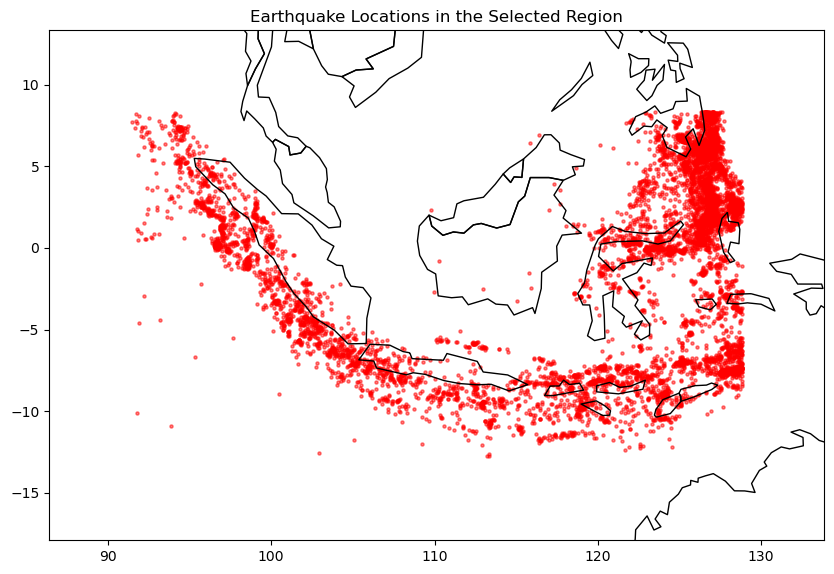

In [2]:
# Plot map of investigating region
df_geo = gpd.GeoDataFrame(data_modified, geometry = gpd.points_from_xy(df.longitude, df.latitude))

# Load the world map (downloaded from Natural Earth)
# Make sure you point this to the correct file location where the shapefiles are extracted
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Defining the extent (bounding box) of the map region 
min_lon, max_lon = 91.406 - 5, 128.848 + 5  # Longitude range
min_lat, max_lat = -12.897 - 5, 8.32 + 5 # Latitude range

# Plot the selected region
fig, ax = plt.subplots(figsize=(10, 8))
world.boundary.plot(ax=ax, linewidth=1, color='black')
df_geo.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)

# Set xlim and ylim to focus on the specifc area we have chosen
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

plt.title('Earthquake Locations in the Selected Region')
plt.show()

## Plotting a graph of the number of earthquakes over time

C:\Users\20233897\AppData\Local\Temp\ipykernel_10184\1912037215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified.loc[:, 'year'] = data_modified['time'].dt.year


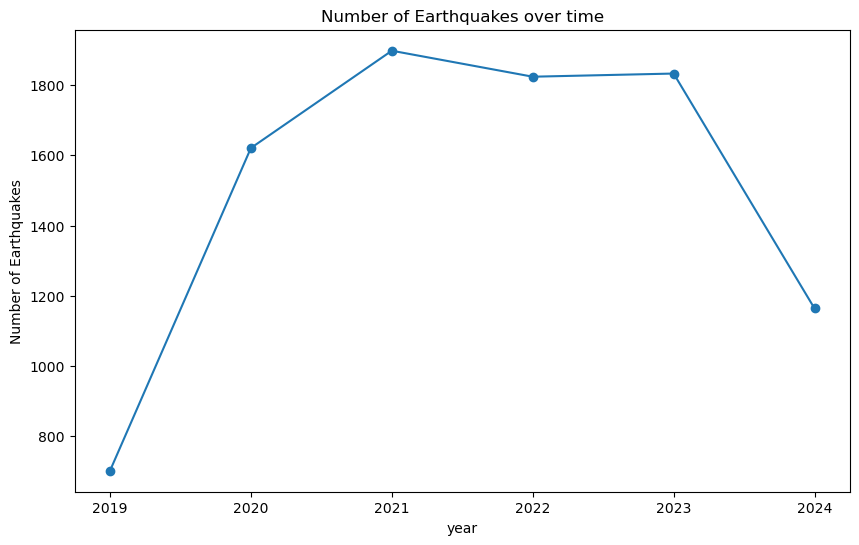

In [3]:
# Group the activities by year and count the number of earthquakes
data_modified.loc[:, 'year'] = data_modified['time'].dt.year

earthquakes_per_year = data_modified.groupby('year').size()

# Plot the number of earthquakes over time
plt.figure(figsize=(10,6))
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values, marker='o')
plt.title('Number of Earthquakes over time')
plt.xlabel('year')
plt.ylabel('Number of Earthquakes')
plt.show()

## Ploting a graph of the seasonal effect to number of earthquakes

C:\Users\20233897\AppData\Local\Temp\ipykernel_10184\985128651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified.loc[:, 'month'] = data_modified['time'].dt.month


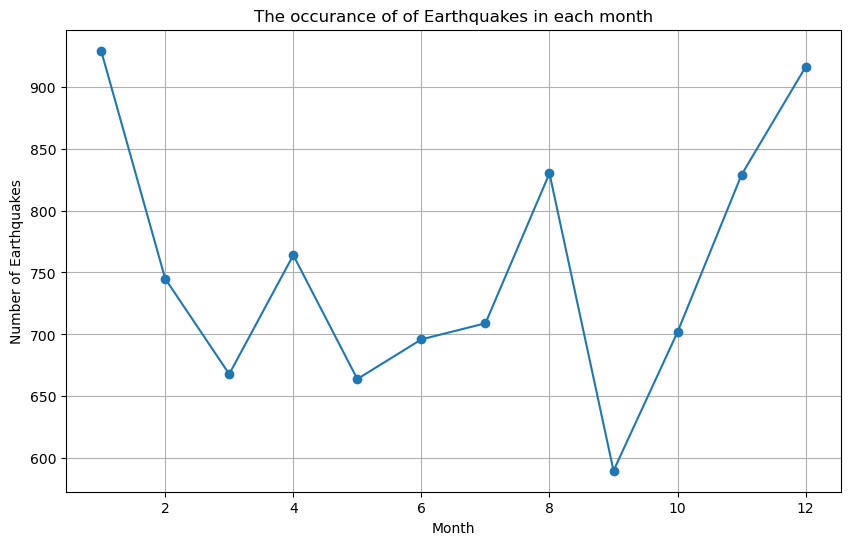

In [4]:
# Group the activities by month and count the number of earthquakes
data_modified.loc[:, 'month'] = data_modified['time'].dt.month

earthquakes_per_month = data_modified.groupby('month').size()

# Plot the number of earthquakes over time
plt.figure(figsize=(10,6))
plt.plot(earthquakes_per_month.index, earthquakes_per_month.values, marker='o')
plt.title('The occurance of of Earthquakes in each month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

## Plotting the distribution of the magnitude of the earthquakes

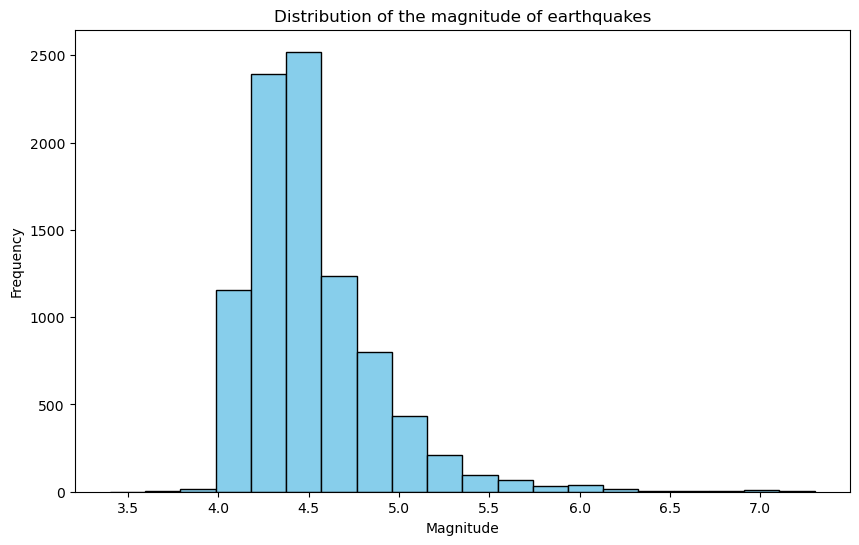

count    9042.000000
mean        4.495211
std         0.377416
min         3.400000
25%         4.300000
50%         4.400000
75%         4.600000
max         7.300000
Name: mag, dtype: float64


In [5]:
# Plot the distribution of the magnitude of earthquakes
plt.figure(figsize=(10,6))
plt.hist(data_modified['mag'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of the magnitude of earthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics of magnitudes
print(df['mag'].describe())

## Distribution Fitting

In [6]:
data_modified['inter_arrival_time'] = data_modified['time'].diff().dt.total_seconds() / 60
data_modified['inter_arrival_time'].info()
data_modified['inter_arrival_time'].head()
interarrivals = data_modified['inter_arrival_time'].dropna()

<class 'pandas.core.series.Series'>
RangeIndex: 9042 entries, 0 to 9041
Series name: inter_arrival_time
Non-Null Count  Dtype  
--------------  -----  
9041 non-null   float64
dtypes: float64(1)
memory usage: 70.8 KB


C:\Users\20233897\AppData\Local\Temp\ipykernel_10184\1863778467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['inter_arrival_time'] = data_modified['time'].diff().dt.total_seconds() / 60


In [7]:
interarrivals.describe()

count    9041.000000
mean      290.895807
std       340.012314
min         0.033100
25%        57.252367
50%       174.926467
75%       400.201433
max      3725.878900
Name: inter_arrival_time, dtype: float64

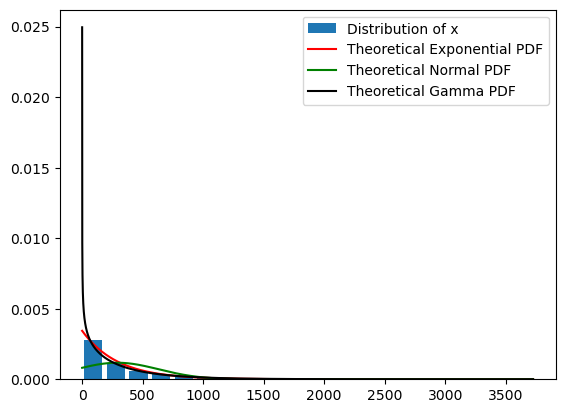

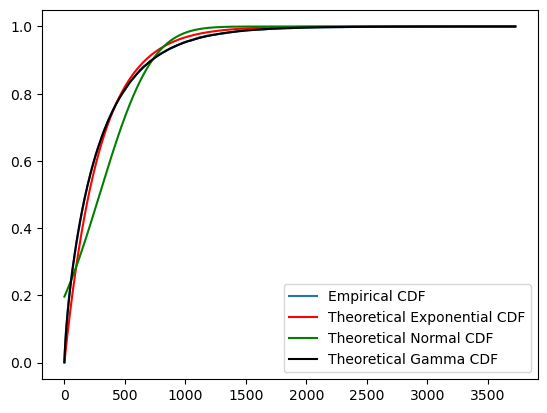

KstestResult(statistic=0.007180270686673658, pvalue=0.7369033064728346)

In [8]:
x = interarrivals
lamEst = 1 / np.mean(x)
estExpDist = stats.expon(scale=1/lamEst)

muEst = np.mean(x)
sigmaEst = np.std(x)
estNormDist = stats.norm(muEst, sigmaEst)

alphaEst = np.mean(x)**2 / np.var(x)
betaEst = np.mean(x) / np.var(x)
estGammaDist = stats.gamma(alphaEst, scale=1/betaEst)

xs = np.arange(min(x), max(x), 0.1)
plt.figure()
plt.hist(x, rwidth = 0.8, bins=20, density=True, label = 'Distribution of x')
plt.plot(xs, estExpDist.pdf(xs), 'r', label = 'Theoretical Exponential PDF')
plt.plot(xs, estNormDist.pdf(xs), 'g', label = 'Theoretical Normal PDF')
plt.plot(xs, estGammaDist.pdf(xs), 'black', label = 'Theoretical Gamma PDF')
plt.legend()
plt.show()

xs2 = np.sort(x)
ys = np.arange(1/len(x), 1 + 1/len(x), 1/len(x))
plt.step(xs2, ys, where='post', label = 'Empirical CDF')
plt.plot(xs, estExpDist.cdf(xs), 'r', label = 'Theoretical Exponential CDF')
plt.plot(xs, estNormDist.cdf(xs), 'g', label = 'Theoretical Normal CDF')
plt.plot(xs, estGammaDist.cdf(xs), 'black', label = 'Theoretical Gamma CDF')
plt.legend()
plt.show()

stats.kstest(x, estExpDist.cdf)
stats.kstest(x, estNormDist.cdf)
stats.kstest(x, estGammaDist.cdf)